In [1]:
import pandas as pd
import numpy as np

# Pour éviter d'avoir les messages warning
import warnings
warnings.filterwarnings('ignore')

# Import des fichiers créés à l'étape précédente.
X_train=pd.read_csv('../data/X_train.csv')
X_test=pd.read_csv('../data/X_test.csv')
y_train=pd.read_csv('../data/y_train.csv')
y_test=pd.read_csv('../data/y_test.csv')

In [2]:
#Ici nous standardisons les données

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

cols=['Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity',
      'Perceptions of corruption','Positive affect','Negative affect']

X_train[cols]=scaler.fit_transform(X_train[cols])
X_test[cols]=scaler.transform(X_test[cols])

In [ ]:
'''
Définition des métriques de performance d'une régression

- Erreur Quadratique Moyenne (MSE) : C'est la moyenne des carrés des écarts entre les valeurs prédites et les 
valeurs réelles. Plus ce nombre est petit, mieux c'est. 

- Erreur Absolue Moyenne (MAE) : C'est la moyenne des valeurs absolues des écarts entre les prédictions et les 
valeurs réelles. 

- Coefficient de Détermination (R^2) : Cette valeur indique la proportion de la variance de la variable dépendante 
qui est prévisible à partir des variables indépendantes.

- Erreur Quadratique Moyenne Racine (RMSE) : C'est la racine carrée de la MSE. Elle est dans les mêmes unités que 
la variable de réponse et peut être plus intuitive.
'''

In [4]:
# Création et entraînement du modèle de régression linéaire
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

lin_reg = LinearRegression() # Instanciation du modèle
lin_reg.fit(X_train, y_train) # Entraînement du modèle

# Prédiction sur l'ensemble de test
y_pred = lin_reg.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE) et de la racine carrée de l'erreur quadratique moyenne (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Affichage des résultats
print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Racine carrée de l'erreur quadratique moyenne (RMSE) : {rmse}")

# Coefficient de détermination R^2
print('Coefficient de détermination du modèle sur le jeu d\'entrainement :', lin_reg.score(X_train, y_train))
print('Coefficient de détermination du modèle sur le jeu de test :', lin_reg.score(X_test, y_test))

Erreur quadratique moyenne (MSE) : 0.287165969303111
Racine carrée de l'erreur quadratique moyenne (RMSE) : 0.5358786889801749
Coefficient de détermination du modèle sur le jeu d'entrainement : 0.7966195121146271
Coefficient de détermination du modèle sur le jeu de test : 0.7705291303436734


In [5]:
# Le modèle de régression linéaire a été détaillé dans le notebook normalisé.
# On ne le redétaille donc pas ici.

In [6]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Création et entraînement du modèle Ridge
ridge = Ridge(alpha=1.0)  # Vous pouvez ajuster le paramètre alpha pour contrôler la force de la régularisation
ridge.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = ridge.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE) et de la racine carrée de l'erreur quadratique moyenne (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Racine carrée de l'erreur quadratique moyenne (RMSE) : {rmse}")

# Si vous souhaitez obtenir le coefficient de détermination R^2
print('Coefficient de détermination du modèle sur le jeu d\'entrainement :', ridge.score(X_train, y_train))
print('Coefficient de détermination du modèle sur le jeu de test :', ridge.score(X_test, y_test))

Erreur quadratique moyenne (MSE) : 0.2872169504313935
Racine carrée de l'erreur quadratique moyenne (RMSE) : 0.5359262546576661
Coefficient de détermination du modèle sur le jeu d'entrainement : 0.7966127638191047
Coefficient de détermination du modèle sur le jeu de test : 0.7704883919376867


In [7]:
from sklearn.tree import DecisionTreeRegressor

# Création et entraînement du modèle d'arbre de décision pour la régression
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = tree_regressor.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE) et de la racine carrée de l'erreur quadratique moyenne (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Racine carrée de l'erreur quadratique moyenne (RMSE) : {rmse}")

# Si vous souhaitez obtenir le coefficient de détermination R^2
print('Coefficient de détermination du modèle sur le jeu d\'entrainement :', tree_regressor.score(X_train, y_train))
print('Coefficient de détermination du modèle sur le jeu de test :', tree_regressor.score(X_test, y_test))

Erreur quadratique moyenne (MSE) : 0.2803557380952381
Racine carrée de l'erreur quadratique moyenne (RMSE) : 0.5294862964187441
Coefficient de détermination du modèle sur le jeu d'entrainement : 1.0
Coefficient de détermination du modèle sur le jeu de test : 0.7759711041319454


In [8]:
from sklearn.ensemble import RandomForestRegressor

# Création et entraînement du modèle Random Forest pour la régression
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Pour ce modèle, on tranforme y_train en un tableau plutôt qu'un dataframe
y_train_1d = y_train.squeeze()

random_forest.fit(X_train, y_train_1d)

# Prédiction sur l'ensemble de test
y_pred = random_forest.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE) et de la racine carrée de l'erreur quadratique moyenne (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Racine carrée de l'erreur quadratique moyenne (RMSE) : {rmse}")

# Si vous souhaitez obtenir le coefficient de détermination R^2
print('Coefficient de détermination du modèle sur le jeu d\'entrainement :', random_forest.score(X_train, y_train))
print('Coefficient de détermination du modèle sur le jeu de test :', random_forest.score(X_test, y_test))

Erreur quadratique moyenne (MSE) : 0.159635994125
Racine carrée de l'erreur quadratique moyenne (RMSE) : 0.3995447335718493
Coefficient de détermination du modèle sur le jeu d'entrainement : 0.9839751636505695
Coefficient de détermination du modèle sur le jeu de test : 0.8724367985203352


In [9]:
from sklearn.neighbors import KNeighborsRegressor

# Création du modèle KNN avec un nombre de voisins défini
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Vous pouvez ajuster le nombre de voisins ici

# Entraînement du modèle sur les données d'entraînement
knn_regressor.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = knn_regressor.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE) et de la racine carrée de l'erreur quadratique moyenne (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Racine carrée de l'erreur quadratique moyenne (RMSE) : {rmse}")

# Si vous souhaitez obtenir le coefficient de détermination R^2
print('Coefficient de détermination du modèle sur le jeu d\'entrainement :', knn_regressor.score(X_train, y_train))
print('Coefficient de détermination du modèle sur le jeu de test :', knn_regressor.score(X_test, y_test))

Erreur quadratique moyenne (MSE) : 0.17643099495238096
Racine carrée de l'erreur quadratique moyenne (RMSE) : 0.42003689713212217
Coefficient de détermination du modèle sur le jeu d'entrainement : 0.9203189879626232
Coefficient de détermination du modèle sur le jeu de test : 0.8590161155087285


In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Création d'un pipeline qui inclut la transformation polynomiale et la régression linéaire
degree = 2  # C'est le degré du polynôme que vous souhaitez ajuster
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Entraînement du modèle sur les données d'entraînement
polyreg.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = polyreg.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE) et de la racine carrée de l'erreur quadratique moyenne (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Racine carrée de l'erreur quadratique moyenne (RMSE) : {rmse}")

# Si vous souhaitez obtenir le coefficient de détermination R^2
print('Coefficient de détermination du modèle sur le jeu d\'entrainement :', polyreg.score(X_train, y_train))
print('Coefficient de détermination du modèle sur le jeu de test :', polyreg.score(X_test, y_test))

Erreur quadratique moyenne (MSE) : 0.3252196738474109
Racine carrée de l'erreur quadratique moyenne (RMSE) : 0.570280346713273
Coefficient de détermination du modèle sur le jeu d'entrainement : 0.7848622613714885
Coefficient de détermination du modèle sur le jeu de test : 0.7401208730678668


In [ ]:
'''
Pour les performances standardisées, nous obtenons (par ordre décroissant du R^2) :
- Random Forest : 87 %
- K neighbors : 85 %
- Régression Ridge : 77 %
- Régression linéaire : 77 %
- Decision tree : 77 %
- Régression polynomiale : 74 %
'''

In [ ]:
'''
Les performances sont donc tendanciellement similaires à l'exception de la régression polynomiale qui perd en 
performance.
On choisi donc également le modèle de random forest et celui de K-neighbors.
'''

In [13]:
from sklearn.model_selection import GridSearchCV

# Paramètres pour GridSearchCV spécifiques au KNeighborsRegressor
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50],
    'p': [1, 2]
}

# Création du modèle KNeighborsRegressor
knn = KNeighborsRegressor()

# Recherche sur grille avec GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Entraînement du modèle avec recherche sur grille
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print(f"Meilleurs paramètres: {grid_search.best_params_}")

# Utilisation du meilleur modèle trouvé
best_grid = grid_search.best_estimator_

# Prédiction sur l'ensemble de test avec le meilleur modèle
y_pred = best_grid.predict(X_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Erreur quadratique moyenne (MSE) après ajustement des hyperparamètres : {mse}")
print(f"Racine carrée de l'erreur quadratique moyenne (RMSE) après ajustement des hyperparamètres : {rmse}")
print('Coefficient de détermination du modèle sur le jeu d\'entrainement :', best_grid.score(X_train, y_train))
print('Coefficient de détermination du modèle sur le jeu de test :', best_grid.score(X_test, y_test))

Fitting 3 folds for each of 320 candidates, totalling 960 fits
Meilleurs paramètres: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Erreur quadratique moyenne (MSE) après ajustement des hyperparamètres : 0.15042961023084367
Racine carrée de l'erreur quadratique moyenne (RMSE) après ajustement des hyperparamètres : 0.3878525624910111
Coefficient de détermination du modèle sur le jeu d'entrainement : 1.0
Coefficient de détermination du modèle sur le jeu de test : 0.8797935090794201


In [14]:
# Paramètres pour GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt']
}

# Transformation de y_train en tableau unidimensionnel (1D)
y_train = y_train.squeeze()

# Création du modèle Random Forest pour la régression
rf = RandomForestRegressor(random_state=42)

# Recherche sur grille
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Entraînement du modèle avec recherche sur grille
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print(f"Meilleurs paramètres: {grid_search.best_params_}")

# Utilisation du meilleur modèle trouvé
best_grid = grid_search.best_estimator_

# Prédiction sur l'ensemble de test avec le meilleur modèle
y_pred = best_grid.predict(X_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Erreur quadratique moyenne (MSE) après ajustement des hyperparamètres : {mse}")
print(f"Racine carrée de l'erreur quadratique moyenne (RMSE) après ajustement des hyperparamètres : {rmse}")
print('Coefficient de détermination du modèle sur le jeu d\'entrainement :', best_grid.score(X_train, y_train))
print('Coefficient de détermination du modèle sur le jeu de test :', best_grid.score(X_test, y_test))

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Meilleurs paramètres: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Erreur quadratique moyenne (MSE) après ajustement des hyperparamètres : 0.1482631932657145
Racine carrée de l'erreur quadratique moyenne (RMSE) après ajustement des hyperparamètres : 0.3850495984489719
Coefficient de détermination du modèle sur le jeu d'entrainement : 0.9849595881415939
Coefficient de détermination du modèle sur le jeu de test : 0.8815246668006251


In [15]:
# Encore une fois, les résultats sont similaires à celui du notebook normalisé.
# On retient donc également le modèle Random Forest.

In [ ]:
'''
On obtient le résultat suivant pour le modèle Random Forest :

Meilleurs paramètres: Meilleurs paramètres: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 
'min_samples_split': 2, 'n_estimators': 300}
Erreur quadratique moyenne (MSE) après ajustement des hyperparamètres : 0.1482631932657145
Racine carrée de l'erreur quadratique moyenne (RMSE) après ajustement des hyperparamètres : 0.3850495984489719
Coefficient de détermination (R^2) après ajustement des hyperparamètres sur le jeu de test : 0.8815246668006251 et 
de 0.9849595881415939 sur le jeu d'entraînement.
'''

In [17]:
# Le modèle s'est donc également légèrement amélioré en passant d'un coefficient de détermination de 87,24% à 88,15%.
# Il reste toutefois un effet de surentraînement du modèle puisqu'on atteint pratiquement un score parfait sur le jeu d'entraînement.

In [18]:
# On affiche ensuite les l’impact des variables dans la détermination de ce modèle :

importances = best_grid.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

# Afficher l'importance de chaque caractéristique
for f in range(X_train.shape[1]):
    print(f"{features[indices[f]]}: {importances[indices[f]]}")

Log GDP per capita: 0.2644704754767673
Healthy life expectancy at birth: 0.20582596998988273
Social support: 0.15559681666093225
Positive affect: 0.08341343888647881
Freedom to make life choices: 0.055684264810106916
Perceptions of corruption: 0.05222167854466696
Regional indicator_Sub-Saharan Africa: 0.05199324519687619
Negative affect: 0.03216917259263002
Generosity: 0.030957772984204598
Regional indicator_Latin America and Caribbean: 0.022243144850159203
Regional indicator_Western Europe: 0.021625211727622762
Regional indicator_South Asia: 0.007387507593328858
Regional indicator_Middle East and North Africa: 0.004345675379305386
Regional indicator_North America and ANZ: 0.0038601020666943118
Regional indicator_East Asia: 0.0029712963875097643
Regional indicator_Commonwealth of Independent States: 0.002695625016782112
Regional indicator_Southeast Asia: 0.002538601836051856


In [ ]:
'''
Quelques explications :

.feature_importances_ est un attribut qui contient l'importance de chaque caractéristique selon le modèle.
Il retourne un tableau où chaque élément correspond à l'importance d'une caractéristique. 
Les importances sont calculées en fonction de l'influence de chaque caractéristique sur la qualité de la division 
des nœuds dans les arbres de la forêt.

indices = np.argsort(importances)[::-1] :

np.argsort(importances) renvoie les indices qui trieraient le tableau importances.

[::-1] inverse l'ordre des indices pour que les caractéristiques les plus importantes apparaissent en premier.
'''

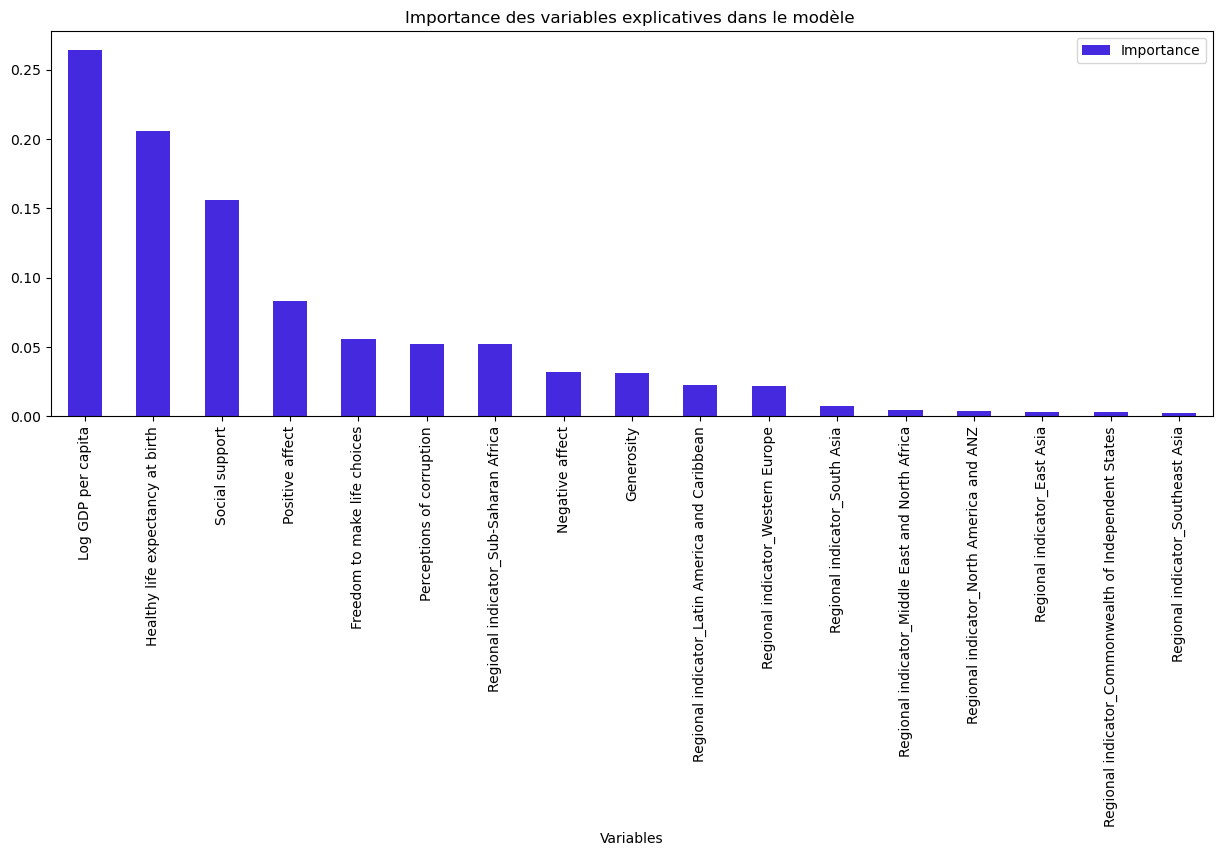

In [20]:
# Puis on les représente graphiquement :
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

feat_importances=pd.DataFrame({
    "Variables":
    X_train.columns,
    "Importance":
    best_grid.feature_importances_
}).sort_values(by='Importance', ascending=False)


feat_importances.plot.bar(x="Variables", y="Importance", figsize=(15, 5), color="#4529de");
plt.title('Importance des variables explicatives dans le modèle ')
plt.show()

In [ ]:
'''
Les variables les plus importantes pour l'algorithme sont :
- Log GDP per capita
- Healthy life expectancy at birth, 
- Social support
- Positive affect.  
'''

In [22]:
# On remarque que les 4 premières caractéristiques représentent une importance d'environ 70,7 %
# On remarque également que les régions Afrique sub-saharienne, Amérique latine et Europe occidentale se détache des autres régions avec respectivement 5% et 2% d'importance là où les autres représentent moins d'un pourcent.

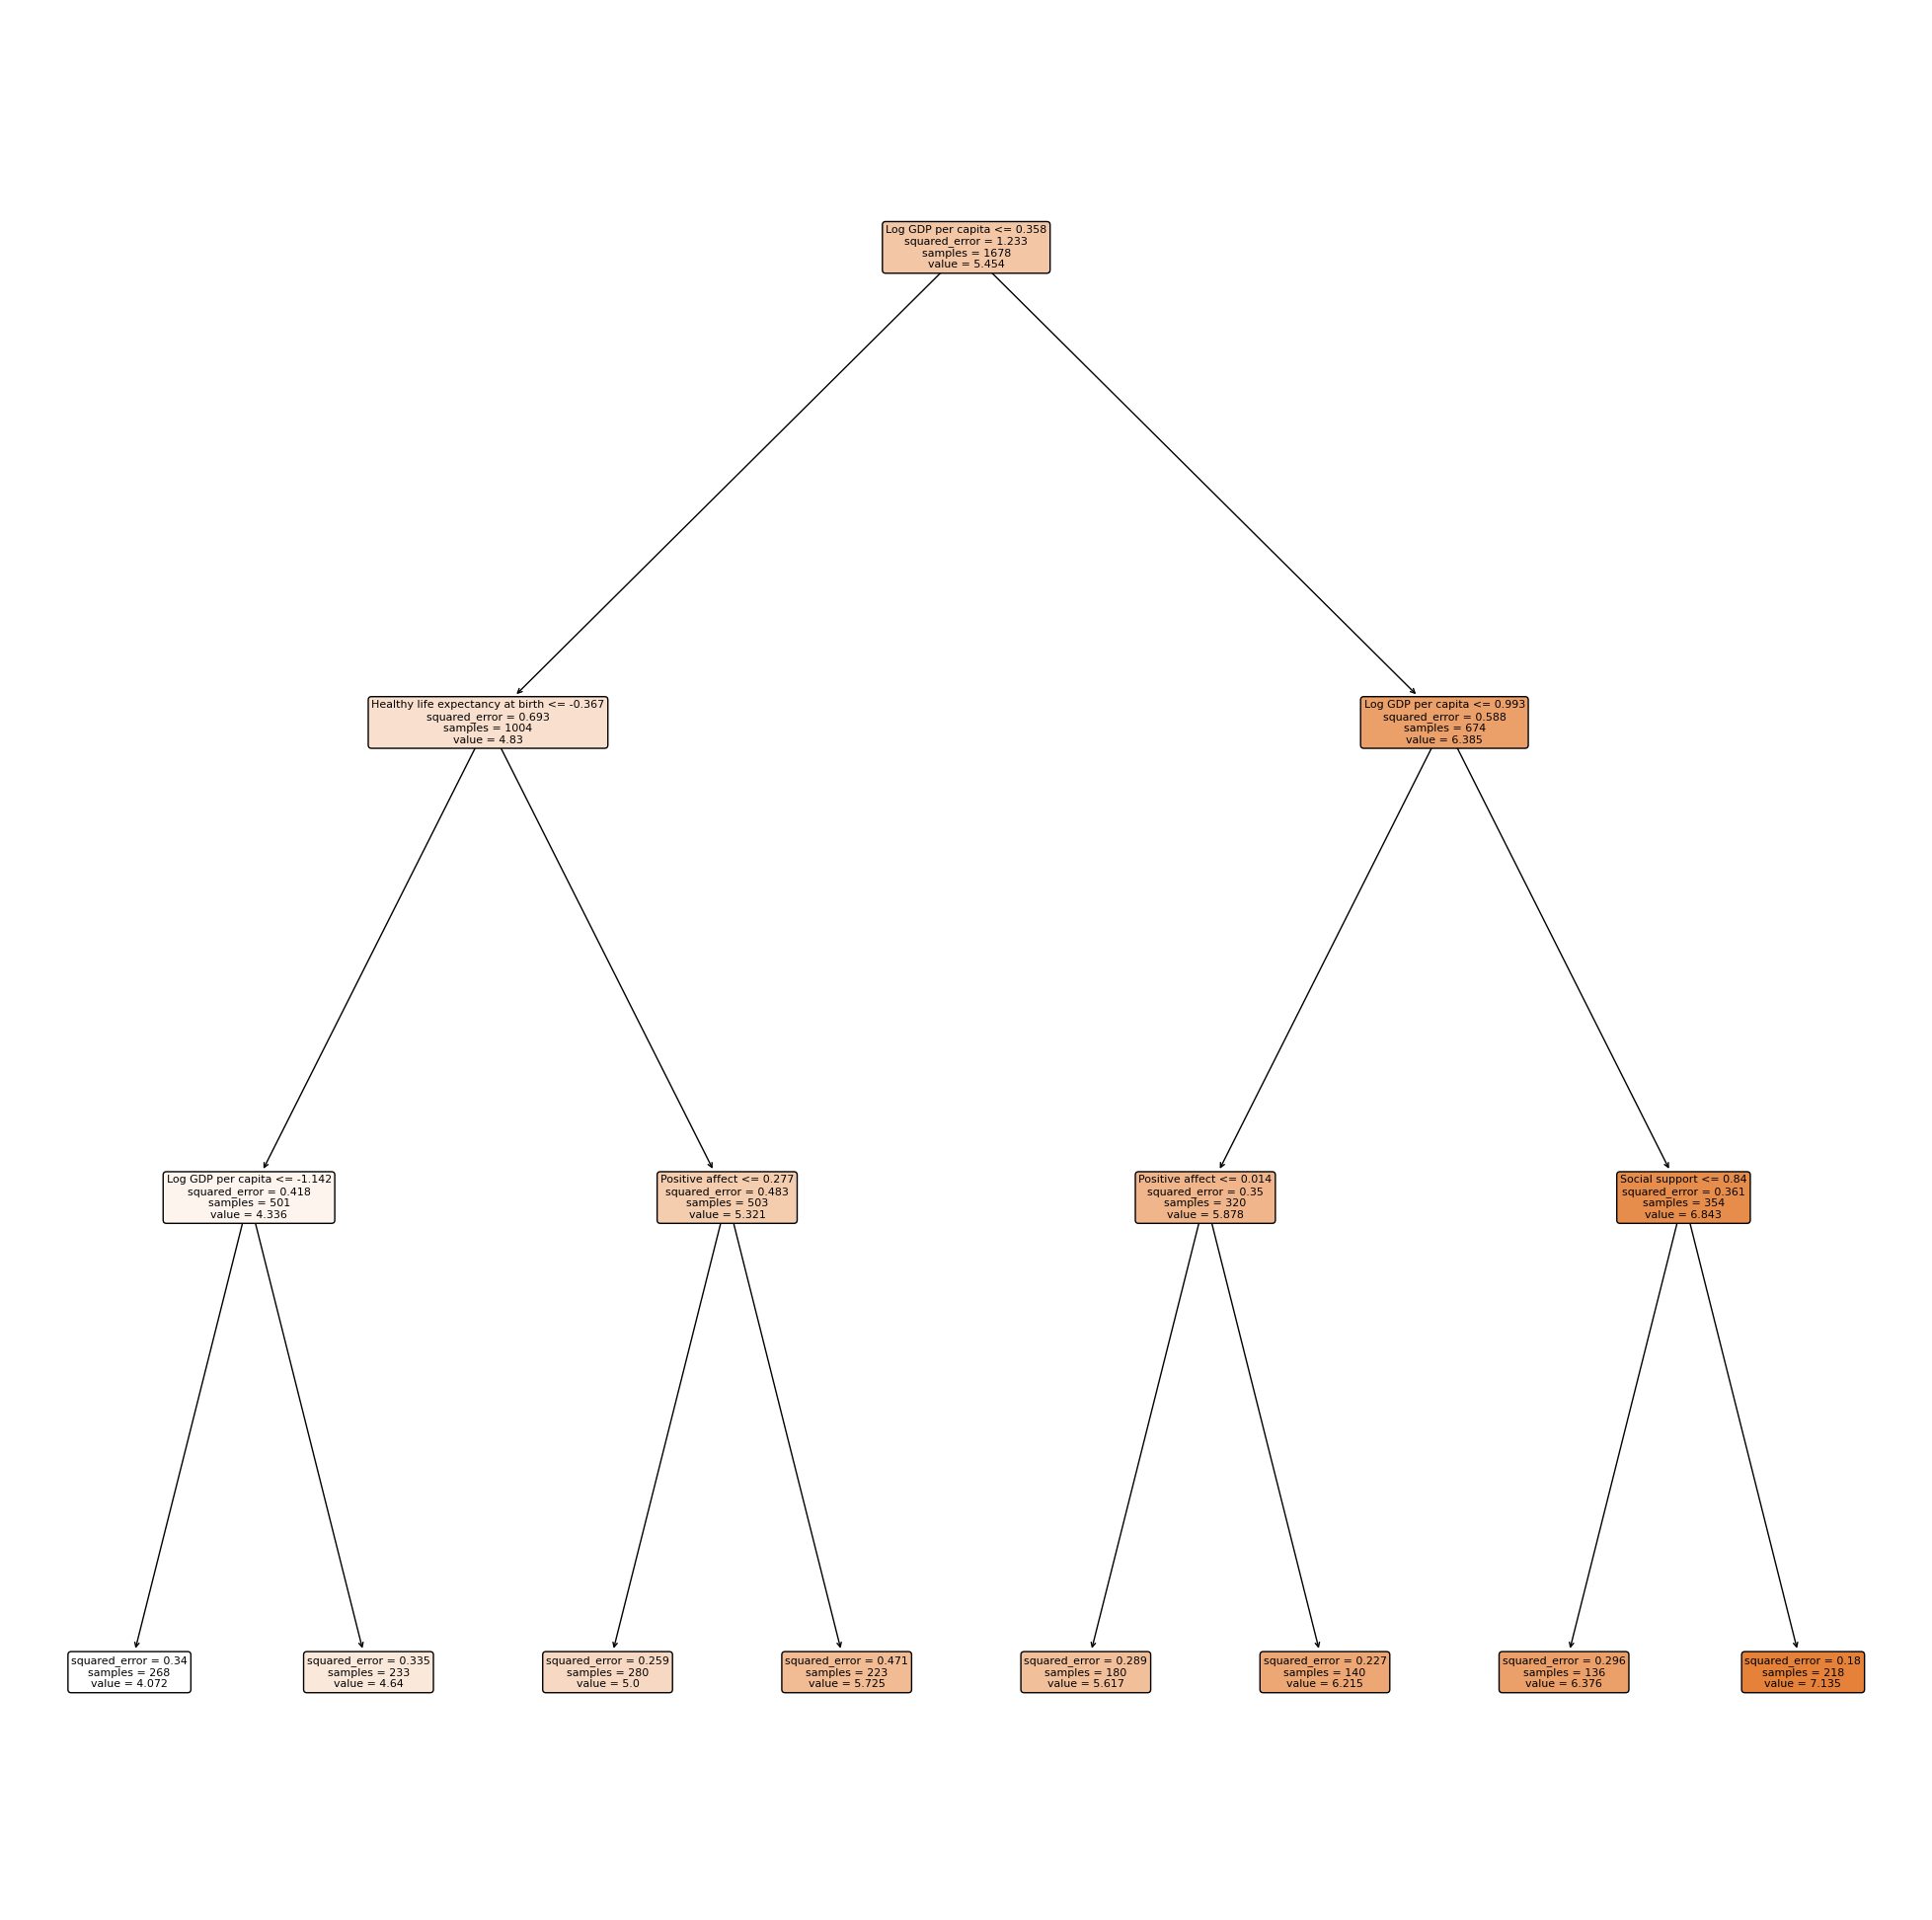

In [23]:
# Représentation graphique des derniers résultats

regressor4 = DecisionTreeRegressor(random_state=42, max_depth=3) 

regressor4.fit(X_train[['Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity',
      'Perceptions of corruption','Positive affect','Negative affect']], y_train)

fig, ax=plt.subplots(figsize=(25, 25))  

plot_tree(regressor4, 
          feature_names=['Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity',
      'Perceptions of corruption','Positive affect','Negative affect'], 
          filled=True, 
          rounded=True)

plt.show()

In [24]:
# On constate que le calcul se fait premierement grâce au PIB par habitant.
# Les données sont séparées entre en deux groupes en fonction de si leur PIB est supérieur ou non à 0,629.

In [25]:
# En conclusion, on constate qu'il n'y a pas de différence majeure entre les modèles entraînés sur les données
# normalisées et ceux entraînés sur les données standardisées.